# Data Science template - Titanic Case

Deze notebook begeleidt je stap voor stap door de **Titanic**-case op Kaggle.
De focus ligt op de standaard Data Science workflow:

1. Probleemdefinitie en doel
2. Data-input & Data cleaning
3. Verkenning (EDA)
4. Feature engineering
5. Modelleren (baseline → verbeterde modellen)
6. **Voorspelling** en export van `submission.csv`

> 🎯 Doel: voorspel de kans dat een passagier de Titanic-vaart heeft overleefd (`Survived`).

## 0. Doel & Omgevings-setup

- Download `train.csv` en `test.csv` handmatig van de Titanic-competitiepagina en plaats ze in een bijvoorbeeld in dezelfde map als dit bestand.


In [1]:
# !python --version


## 1. Imports

In [3]:
import pandas as pd
import numpy as np

# Visualisatie
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & evaluatie
# import sklearn

# Hiermee laat je alle kolommen standaard zien
pd.set_option('display.max_columns', None)

## 2. Probleemdefinitie

- **Input**: passagiersgegevens zoals `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, etc.
- **Output**: binaire target `Survived` (0 = niet overleefd, 1 = overleefd).
- **Metric (Kaggle leaderboard)**: **Accuracy** op de testset (zonder labels).


## 3. Data inladen

In [4]:
# Je gaat werken met de train data. In de test data staan de Survived kolom niet ingevuld. Deze moet je dus zelf voorspellen.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.describe()

print(train.shape, test.shape)
train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Snelle datacheck & Preprocessing

Waar missen we (rijen met) data? Je kan missende data invullen door bijvoorbeeld voor bepaalde soort data op een bepaalde manier in te vullen:

- Numeriek: imputatie (median) + scaling
- Categorisch: imputatie (most_frequent) + one-hot encoding

In [5]:
#display(train.sample(5, random_state=42))
#display(train.describe(include='all'))
#train.isna().mean().sort_values(ascending=False)[:10]

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. Verkennende Data Analyse (EDA)

> Tip: Voeg hier extra grafieken toe (bijv. histogrammen, boxplots, countplots per feature).


In [11]:
# Voorbeeld: verdeling overleven per geslacht
Sex_n = pd.crosstab(train['Sex'], train['Survived'], normalize='index')
Pclass_n = pd.crosstab(train['Pclass'], train['Survived'], normalize='index')
Ticket_n = pd.crosstab(train['Ticket'], train['Survived'], normalize='index')
Age_n = pd.crosstab(train['Age'], train['Survived'], normalize='index')

print(Pclass_n)
print(Sex_n)

dic = {'Sex':'female', 'Pclass':2,
       'Sex':'male', 'Pclass':3}

a = Sex_n[1].loc[dic['Sex']]
b = Pclass_n[1].loc[dic['Pclass']]

print(a * b)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908
0.04578425524254607


In [12]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

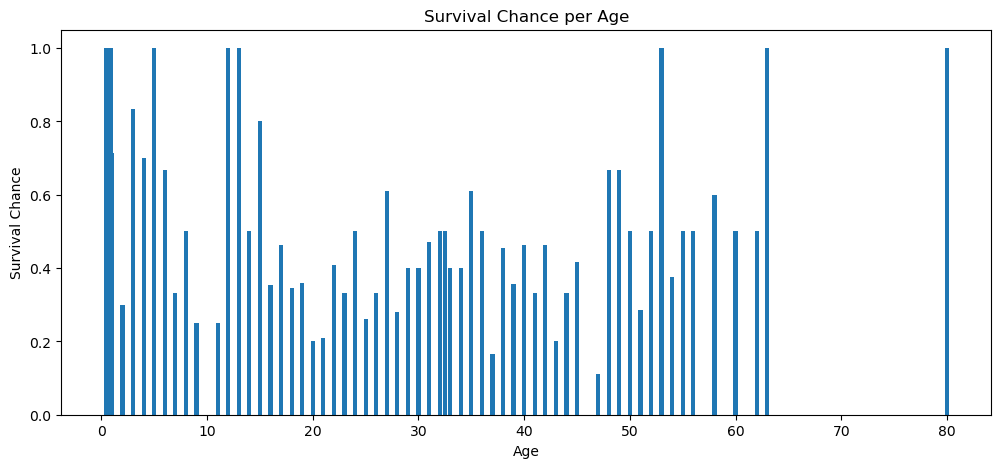

In [13]:
# Convert Series to DataFrame
df = Age_n[1].reset_index()
df.columns = ["Age", "SurvivalChance"]

# Plot as bar chart
plt.figure(figsize=(12,5))
plt.bar(df["Age"], df["SurvivalChance"], width=0.4)
plt.xlabel("Age")
plt.ylabel("Survival Chance")
plt.title("Survival Chance per Age")
plt.show()


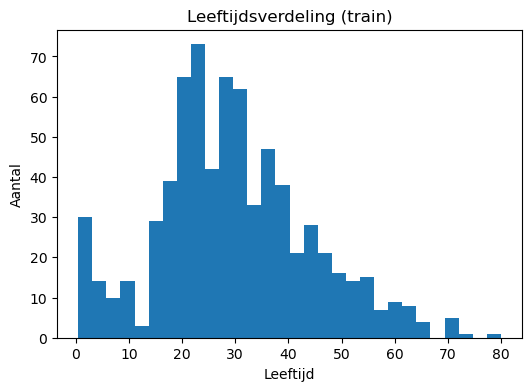

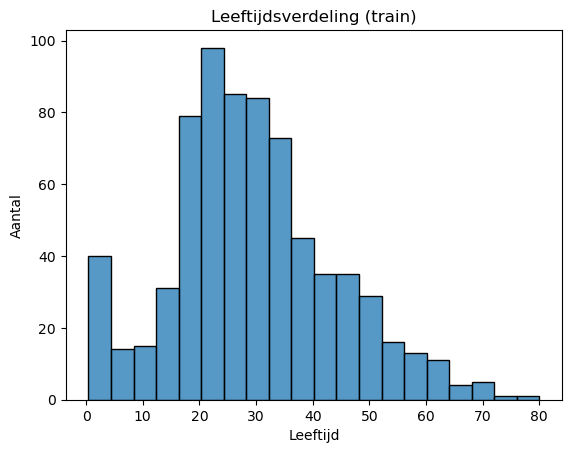

In [9]:
# Voorbeeld: verdeling leeftijd (met eenvoudige imputatie voor visualisatie)
# we verwijderen simpelweg alle rijen waar geen leeftijd bekend is.
ages = train['Age'].dropna()
plt.figure(figsize=(6,4))
plt.hist(ages, bins=30)
plt.title('Leeftijdsverdeling (train)')
plt.xlabel('Leeftijd'); plt.ylabel('Aantal')
plt.show()

sns.histplot(ages)
plt.title('Leeftijdsverdeling (train)')
plt.xlabel('Leeftijd'); plt.ylabel('Aantal')
plt.show()

In [ ]:
# Oefening: voeg je eigen EDA toe
# Gebruik Seaborn in plaats van Matplotlib.
# TODO: tel bijvoorbeeld overlevingspercentage per Pclass, Embarked, Fare-quantiles (pd.qcut), etc.

## 6. Feature Engineering

Voeg hier zelf extra features toe (bijv. `Title` uit `Name`, `FamilySize = SibSp + Parch + 1`, indicatoren, etc.).

Zorg wel dat het relevant is voor je eigen onderzoek. Waar ligt je eigen focus.

In [ ]:
# Je kan nu zelf features aanmaken invullen. 

## 7. Baseline model — np.where invullen

In [ ]:
# === 3. Regelgebaseerde baseline met np.where ===
# Regel: vrouwen overleven altijd, jongens (<10 jaar) ook, anders niet
train_pred = np.where(
    (train['Sex'] == 'female') | ((train['Sex'] == 'male') & (train['Age'] < 10)),
    1, 0
)

## 8. Maak een eindmodel op volledige trainingsdata en voorspel op test

Hier kiezen we als voorbeeld het np.where model (of gebruik anders een ander model).


In [ ]:
# === 4. Toepassen op testset ===
test_pred = np.where(
    (test['Sex'] == 'female') | ((test['Sex'] == 'male') & (test['Age'] < 10)),
    1, 0
)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred.astype(int)
})

submission.to_csv("submission.csv", index=False)
print("submission.csv aangemaakt!")
submission.head()

## 9. Checklist & Volgende stappen

- [ ] Zorg dat er een duidelijke samenhang is tussen de grafieken -> Feature Engineering -> je uiteindelijke model! Dat is het belangrijkst.
- [ ] Laat geen grafieken zien waar je niks mee doet tijdens de presentatie.
- [ ] Zorg dat er dus een rode draad is in je verhaal. 

Voorbeeld: We hebben de focus gelegd op leeftijd -> EDA laat deze grafieken met leeftijd zien. We hebben met Feature Engineering nog leeftijdsgroepen aangemaakt -> We hebben in het model de leeftijden gebruikt. Dit is onze score.

- [ ] Eventueel EDA (een klein beetje) uitbreiden (meer grafieken, correlaties, outliers)
- [ ] Feature engineering verbeteren (wat is er relevant?)
- [ ] Meer modellen proberen (Logistic Regression? Sklearn)
- [ ] Submission inleveren op kaggle en kijken hoe goed je score is

Succes met de case!